# Spotify Top 50 Songs Every Year From 2010-2019

# Part 1 - EDA and Data Visualization

## Import packages and intitial EDA

In [2163]:
#first import of packages 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score

%matplotlib inline

In [2164]:
df = pd.read_csv(r'/Users/sambrady/Datasets/top10s.csv', encoding = "ISO-8859-1")

df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2165]:
#Renaming the columns

df.rename(columns={'title':'Track Name','artist':'Artist Name','bpm':'Beats Per Minute','top genre':'Genre','nrgy':'Energy','dnce':'Danceability', 'dB':'Loudness dB','spch':'Speechiness','live':'Liveness','val':'Valence','dur':'Length','acous':'Acousticness','pop':'Popularity'},inplace=True)
df.head()

,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2166]:
# The datatypes of the different columns

print(df.dtypes)

Unnamed: 0           int64
Track Name          object
Artist Name         object
Genre               object
year                 int64
Beats Per Minute     int64
Energy               int64
Danceability         int64
Loudness dB          int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [2167]:
# Get initial descriptive statistics on the columns

pd.set_option('precision', 3)
df.describe()

,Unnamed: 0,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000
mean,302.000,2014.592,118.546,70.504,64.380,-5.579,17.774,52.226,224.675,14.327,8.358,66.521
std,174.215,2.607,24.795,16.311,13.379,2.798,13.103,22.513,34.130,20.766,7.483,14.518
min,1.000,2010.000,0.000,0.000,0.000,-60.000,0.000,0.000,134.000,0.000,0.000,0.000
25%,151.500,2013.000,100.000,61.000,57.000,-6.000,9.000,35.000,202.000,2.000,4.000,60.000
50%,302.000,2015.000,120.000,74.000,66.000,-5.000,12.000,52.000,221.000,6.000,5.000,69.000
75%,452.500,2017.000,129.000,82.000,73.000,-4.000,24.000,69.000,239.500,17.000,9.000,76.000
max,603.000,2019.000,206.000,98.000,97.000,-2.000,74.000,98.000,424.000,99.000,48.000,99.000


## Categorical EDA with bar graphs to see most popular Artists, Genres, and Tracks

In [2168]:
#Calculating the top 20 songs of the decade


high_pop = df[df['Popularity'] >= 86].sort_values('Popularity')

high_pop.head()

,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
586,587,Don't Call Me Up,Mabel,dance pop,2019,99,88,67,-3,8,23,178,30,15,86
210,211,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86
444,445,Closer,The Chainsmokers,electropop,2017,95,52,75,-6,11,66,245,41,3,86
508,509,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,86
584,585,Beautiful People (feat. Khalid),Ed Sheeran,pop,2019,93,65,64,-8,8,55,198,12,19,86


<function matplotlib.pyplot.show(*args, **kw)>

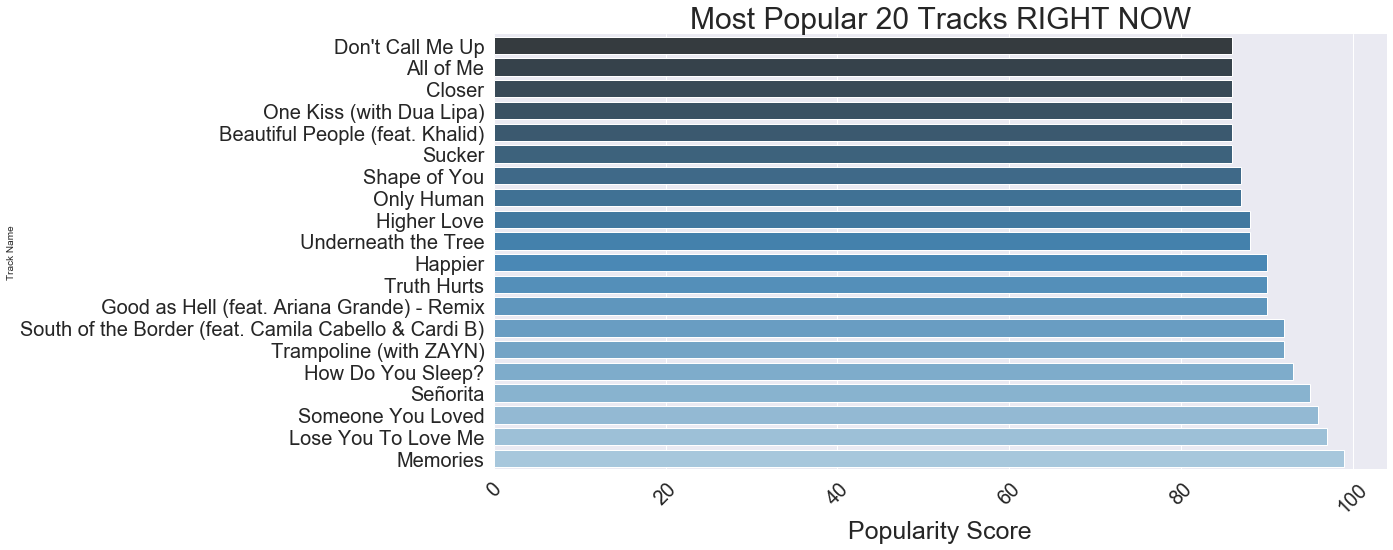

In [2169]:
plt.figure(figsize=(16,8))


ax = sns.barplot(x = 'Popularity', y = 'Track Name', data = high_pop, orient = 'h', palette = sns.color_palette("Blues_d", 20), saturation = 0.8)

plt.title("From the List the Most Popular 20 Tracks RIGHT NOW",fontsize=30)
plt.xlabel('Popularity Score', fontsize=25)
plt.ylabel('Track Name', fontsize=10)


plt.xticks( size=20,rotation=45)
plt.yticks( size=20)
sns.despine(bottom=True, left=True)


plt.show




In [2170]:
#Calculating the number of songs of each genre

print(type(df['Genre']))

popular_genre = df.groupby('Genre').size()

popular_genre = popular_genre.sort_values(ascending=False)

popular_genre

genre_list = df['Genre'].values.tolist()

genre_top20 = popular_genre[0:20,]

genre_top20 = genre_top20.sort_values(ascending=True)

genre_top20 = pd.DataFrame(genre_top20, columns = [ 'Number of Songs'])

genre_top20.head()

<class 'pandas.core.series.Series'>


,Number of Songs
Genre,
permanent wave,4
hip hop,4
latin,4
atl hip hop,5
edm,5


<function matplotlib.pyplot.show(*args, **kw)>

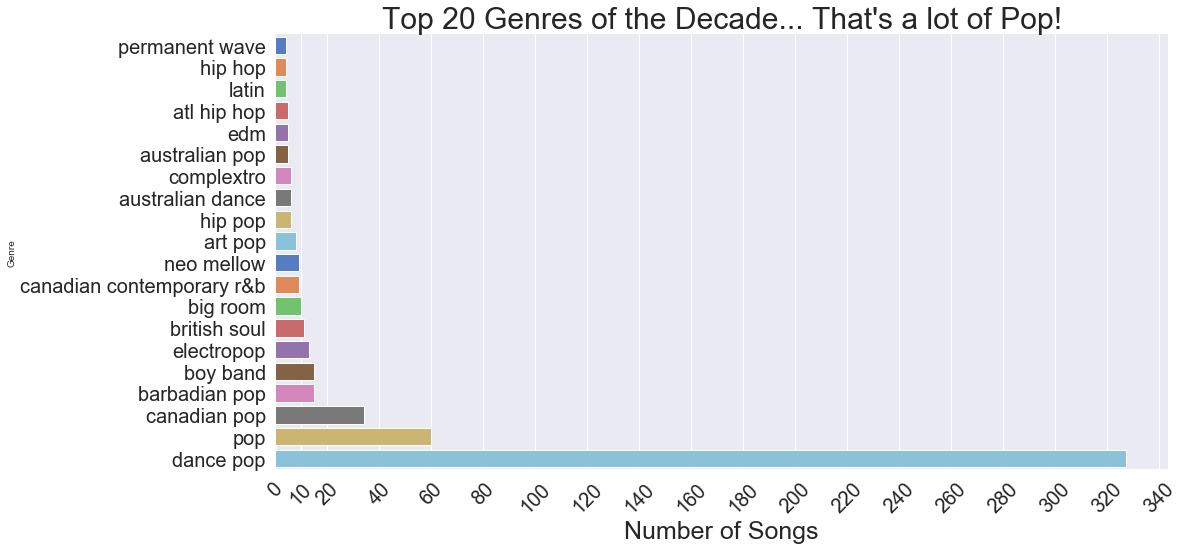

In [2171]:
plt.figure(figsize=(16,8))


ax = sns.barplot(x = 'Number of Songs' , y = genre_top20.index , data = genre_top20, orient = 'h', palette = sns.color_palette("muted", 20), saturation = 0.8)

plt.title("Top 20 Genres of the Decade... That's a lot of Pop!",fontsize=30)
plt.xlabel('Number of Songs', fontsize=25)
plt.ylabel('Genre', fontsize=10)

xticks = [0, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]

plt.xticks(xticks, size=20,rotation=45)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)


plt.show

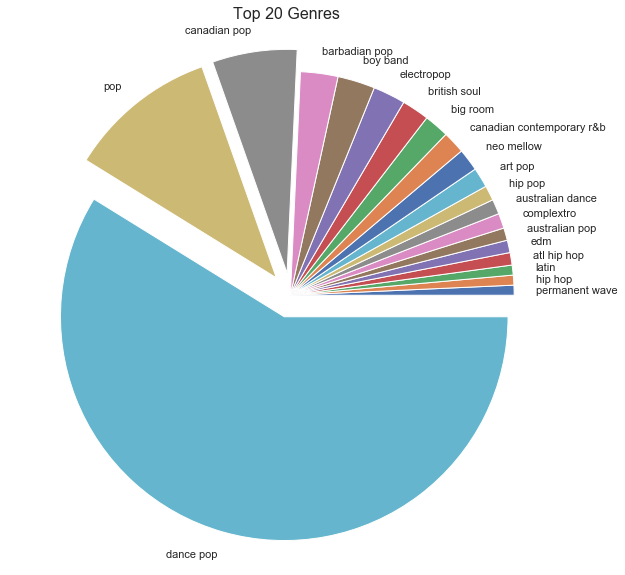

In [2172]:
#Pie chart to show top 20 genres

labels = genre_top20.index
sizes = genre_top20.values

explode = (  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1)

plt.figure(figsize = (10,10))

plt.pie(sizes, labels = labels, explode = explode)

plt.title("Top 20 Genres", fontsize=16)

autopct=('%1.1f%%')
plt.axis('equal')

plt.show()

In [2173]:
#Calculating the least popular genres


genre_bot29 = popular_genre[21:,]

genre_bot29 = genre_bot29.sort_values(ascending=True)

genre_bot29 = pd.DataFrame(genre_bot29, columns = [ 'Number of Songs'])

genre_bot29.head()

,Number of Songs
Genre,
chicago rap,1
canadian latin,1
electro house,1
celtic rock,1
hollywood,1


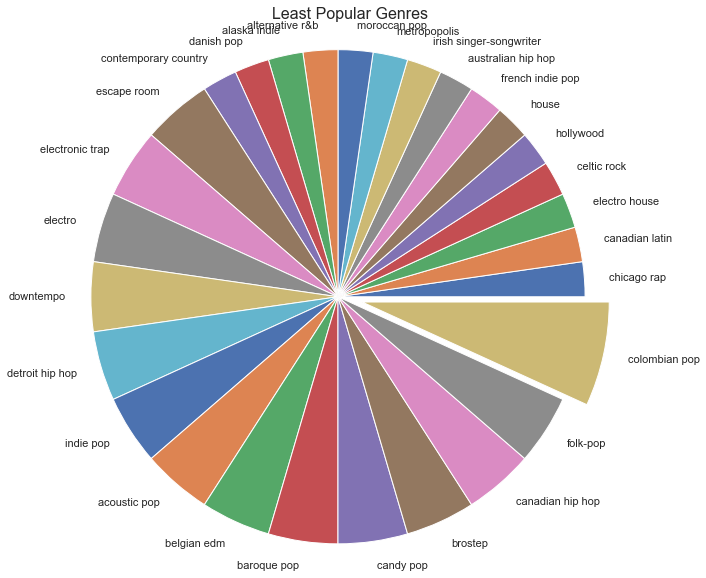

In [2174]:
#Pie chart to show bottom 35 genres

labels = genre_bot29.index
sizes = genre_bot29.values

explode = ( 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

plt.figure(figsize = (10,10))

plt.pie(sizes, labels = labels, explode = explode)

plt.title("Least Popular Genres", fontsize=16)

autopct=('%1.1f%%')
plt.axis('equal')

plt.show()

In [2175]:
#Calculating the number of songs by each of the artists


popular_artist = df.groupby('Artist Name').size()

popular_artist = popular_artist.sort_values(ascending=False)

popular_artist

artist_list=df['Artist Name'].values.tolist()

artist_top25 = popular_artist[0:25,]

artist_top25 = artist_top25.sort_values(ascending=True)

artist_top25 = pd.DataFrame(artist_top25, columns = [ 'Number of Songs'])

artist_top25.head() 

,Number of Songs
Artist Name,
DNCE,7
One Direction,7
Taylor Swift,8
Selena Gomez,8
Beyoncé,8


<function matplotlib.pyplot.show(*args, **kw)>

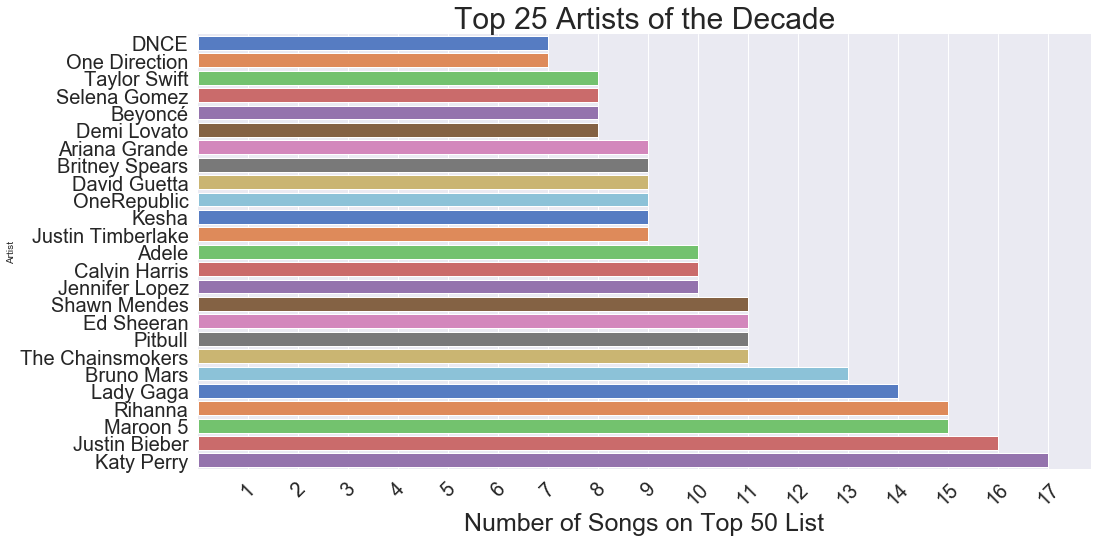

In [2176]:
plt.figure(figsize=(16,8))


ax = sns.barplot(x = 'Number of Songs' , y = artist_top25.index , data = artist_top25, orient = 'h', palette = sns.color_palette("muted", 25), saturation = 0.8)

plt.title("Top 25 Artists of the Decade",fontsize=30)
plt.xlabel('Number of Songs on Top 50 List', fontsize=25)
plt.ylabel('Artist', fontsize=10)

xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

plt.xticks(xticks, size=20,rotation=45)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)


plt.show

<function matplotlib.pyplot.show(*args, **kw)>

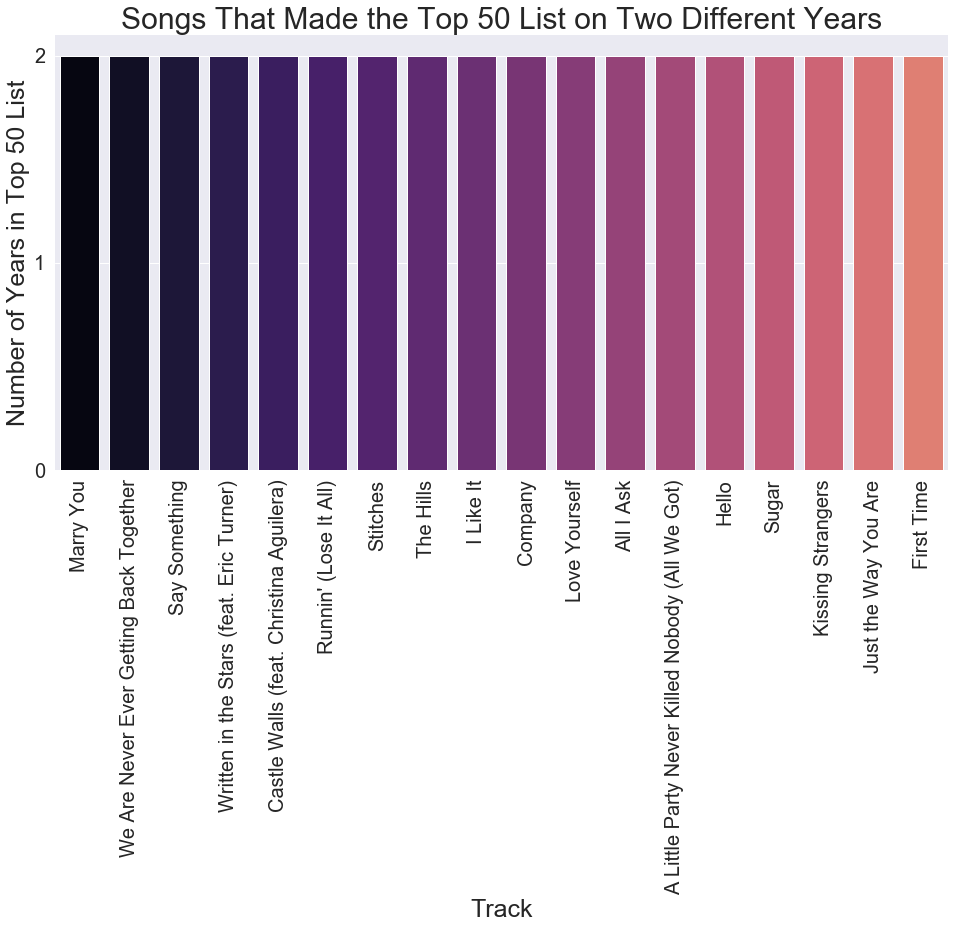

In [2177]:
# Songs that made the top 50 list twice

plt.figure(figsize=(16,8))

tracks = pd.value_counts(df['Track Name']).iloc[:18].index

sns.countplot(df['Track Name'], order = tracks, orient = 'h', palette = sns.color_palette("magma", 25), saturation =0.7)

plt.title('Songs That Made the Top 50 List on Two Different Years',fontsize=30)
plt.xlabel('Track', fontsize=25)
plt.ylabel('Number of Years in Top 50 List', fontsize=25)

plt.xticks(size=20,rotation=90)
plt.yticks( [0, 1, 2]  , size=20)
sns.despine(bottom=True, left=True)


plt.show

## Investigating  bad data

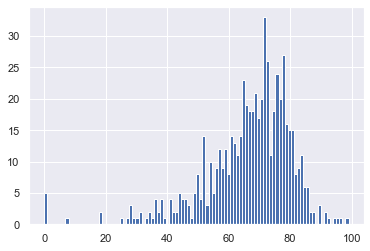

In [2178]:
# Plotting a histogram to show the spread of Popularity since we notice some strange stats worth investigating

plt.hist(df['Popularity'],bins=100)

plt.show()

In [2179]:
# Investigating low popularity

low_pop = df[df['Popularity'] <= 20]

low_pop

,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
50,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
103,104,Muny - Album Version (Edited),Nicki Minaj,dance pop,2011,98,72,80,-5,19,53,227,56,33,7
138,139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
267,268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
361,362,Dangerous,Jennifer Hudson,dance pop,2015,109,53,90,-5,8,65,255,0,5,18
362,363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
441,442,Behind Your Back,Nelly Furtado,canadian latin,2016,98,47,80,-10,7,69,228,25,4,18
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [2180]:
# Inspect bad data...  How can the popularity be 0 if these are top 50 songs?

df.loc[df['Popularity']==0]

,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
50,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
138,139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
267,268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
362,363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [2181]:
# drop bad data

df = df.drop(df.index[[50, 138, 267, 362, 442]])

df = df.reset_index()

# check it's gone

df.iloc[[50, 138, 267, 362, 442]]

,index,Unnamed: 0,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
50,51,52,A Thousand Years,Christina Perri,dance pop,2011,139,41,42,-7,11,16,285,31,3,81
138,140,141,Wake Me Up,Avicii,big room,2013,124,78,53,-6,16,64,247,0,5,85
267,270,271,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
362,366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,16,17,81
442,447,448,That's What I Like,Bruno Mars,pop,2017,134,56,85,-5,9,86,207,1,4,83


In [2182]:
# clean up index

df = df.drop('index', axis=1)
df = df.drop('Unnamed: 0', axis=1)


df.head()

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Statistical EDA to see spread and scope of data

In [2183]:
# Get descriptive statistics on the columns to see the change

pd.set_option('precision', 3)

df.describe()

,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000
mean,2014.602,118.651,70.589,64.527,-5.492,17.758,52.339,224.659,14.396,8.391,67.077
std,2.608,24.141,16.007,13.152,1.701,13.100,22.459,34.154,20.817,7.501,13.235
min,2010.000,43.000,4.000,23.000,-15.000,2.000,4.000,134.000,0.000,3.000,7.000
25%,2013.000,100.000,61.000,57.000,-6.000,9.000,35.000,202.000,2.000,4.000,60.000
50%,2015.000,120.000,74.000,66.000,-5.000,12.000,52.000,220.500,6.000,5.000,69.000
75%,2017.000,129.000,82.000,73.750,-4.000,24.000,69.000,239.000,17.000,9.000,76.000
max,2019.000,206.000,98.000,97.000,-2.000,74.000,98.000,424.000,99.000,48.000,99.000


In [2184]:
# get df ready for scatter matrix

df_features = df.drop(df.columns[[0, 1, 2, 3]], axis =1)

df_features.head()

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78


## Normalization of the data to get the values between 0 and 1 in order to help with regression analysis

In [2185]:
# Normalize the data with Min/Max

df_norm = df_features

scaler = MinMaxScaler() 

df_norm = scaler.fit_transform(df_norm)

df_norm = pd.DataFrame(df_norm, columns = df_features.columns)

df_norm.describe()

,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000
mean,0.464,0.708,0.561,0.731,0.219,0.514,0.313,0.145,0.120,0.653
std,0.148,0.170,0.178,0.131,0.182,0.239,0.118,0.210,0.167,0.144
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.350,0.606,0.459,0.692,0.097,0.330,0.234,0.020,0.022,0.576
50%,0.472,0.745,0.581,0.769,0.139,0.511,0.298,0.061,0.044,0.674
75%,0.528,0.830,0.686,0.846,0.306,0.691,0.362,0.172,0.133,0.750
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


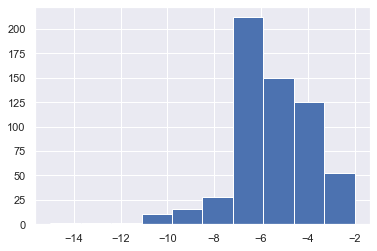

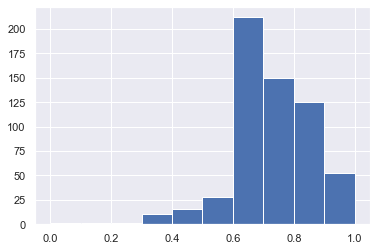

In [2186]:
# Plotting a histogram to show the difference (note the x-axis)

plt.hist(df_features['Loudness dB'], bins=10)     #original data
plt.show()


plt.hist(df_norm['Loudness dB'], bins=10)          #standardized data
plt.show()

## Analyzing the features and their interdependencies

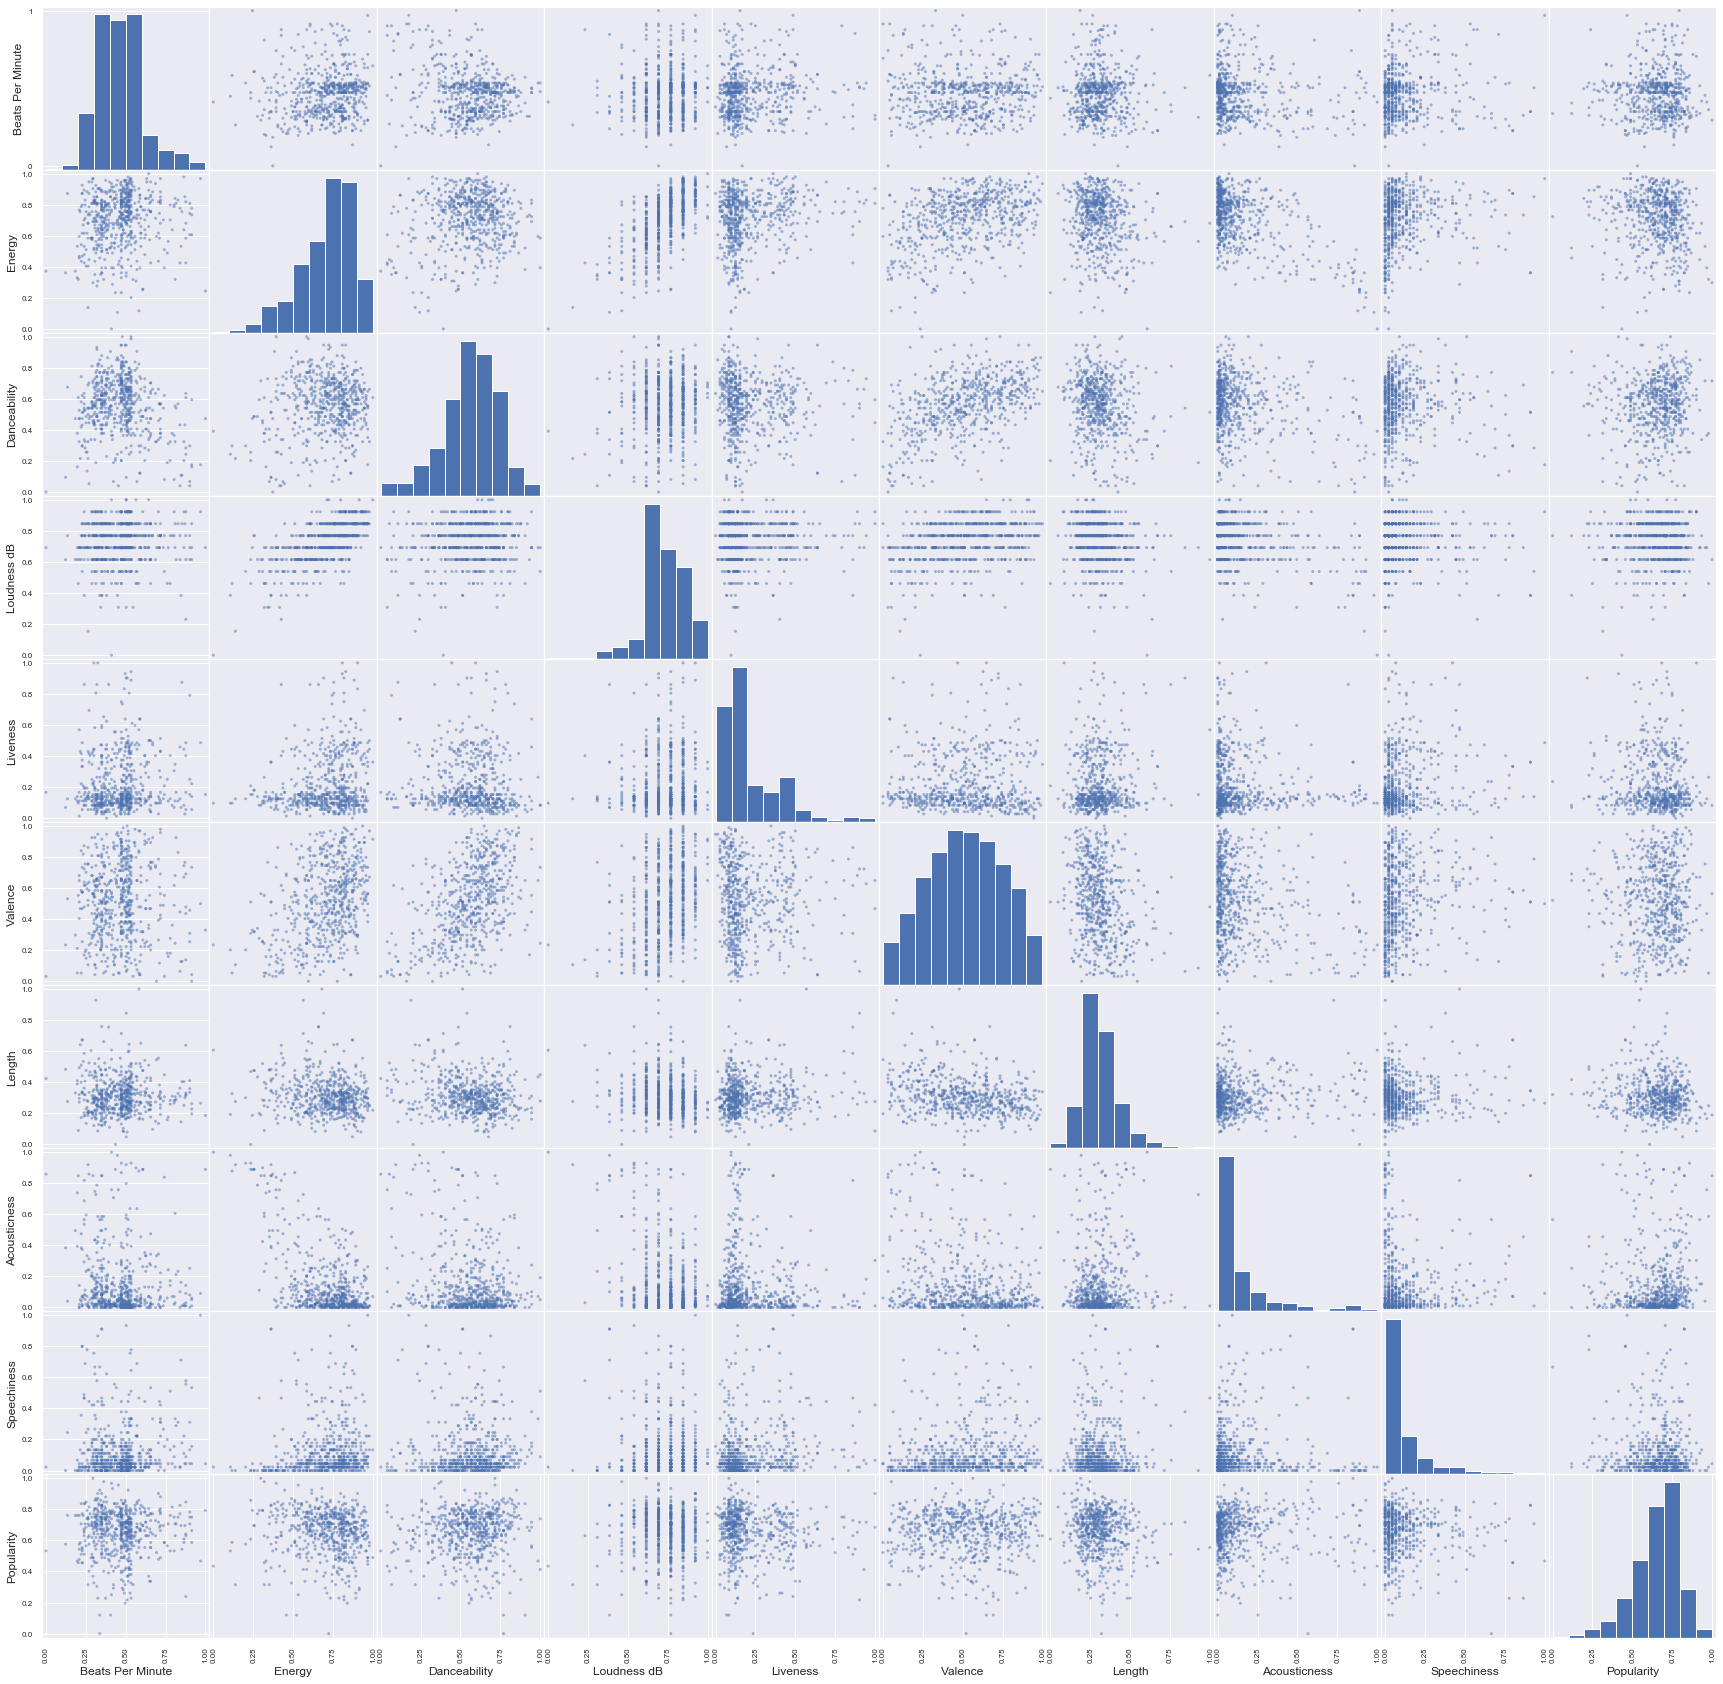

In [2187]:
# Visualizing the relationship between all features

scatter_matrix(df_norm)

plt.gcf().set_size_inches(30, 30)

plt.show()

In [2188]:
# Use a spearman correlation to measure the relationship between features

pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlation = df_norm.corr(method='spearman')

print(correlation)

                  Beats Per Minute  Energy  Danceability  Loudness dB  Liveness  Valence  Length  \
Beats Per Minute             1.000   0.145        -0.084        0.088     0.095    0.025   0.031   
Energy                       0.145   1.000         0.019        0.634     0.138    0.366  -0.141   
Danceability                -0.084   0.019         1.000        0.074    -0.103    0.481  -0.173   
Loudness dB                  0.088   0.634         0.074        1.000     0.057    0.324  -0.173   
Liveness                     0.095   0.138        -0.103        0.057     1.000   -0.060   0.062   
Valence                      0.025   0.366         0.481        0.324    -0.060    1.000  -0.265   
Length                       0.031  -0.141        -0.173       -0.173     0.062   -0.265   1.000   
Acousticness                -0.156  -0.340        -0.114       -0.168    -0.062   -0.185   0.042   
Speechiness                  0.053   0.219         0.085        0.063     0.120    0.185  -0.082   


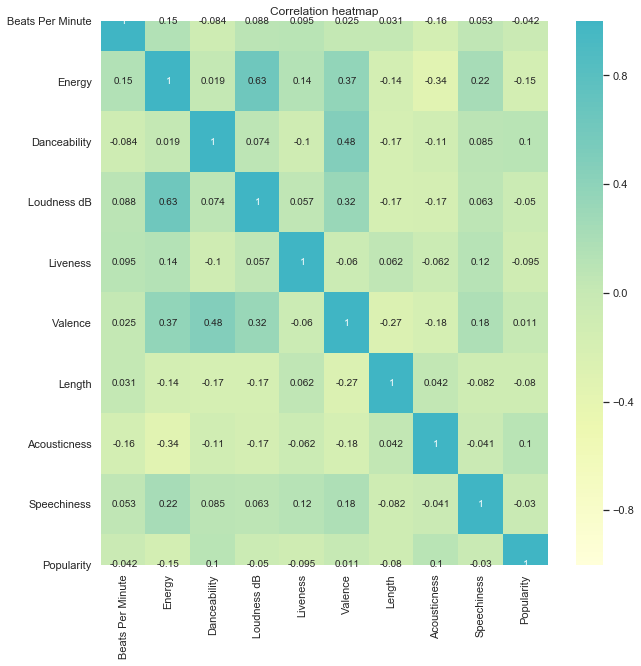

In [2189]:
# heatmap of the correlation to visualize the relationships between features

plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')

sns.heatmap(correlation, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", center=1)

The spearman correlation is:   0.48133621845749974


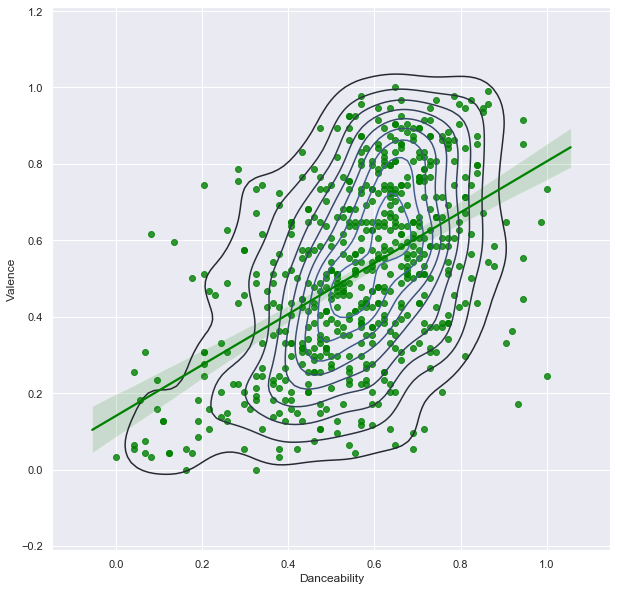

In [2190]:
# Analysing the relationship between Danceablity and Valence

fig = plt.subplots(figsize = (10,10))

sns.regplot(x = 'Danceability', y = 'Valence', data = df_norm, color = 'green')

sns.kdeplot(df_norm['Danceability'], df_norm['Valence'])

print('The spearman correlation is:  ',correlation['Danceability']['Valence'])

The spearman correlation is:   0.6335687421574048


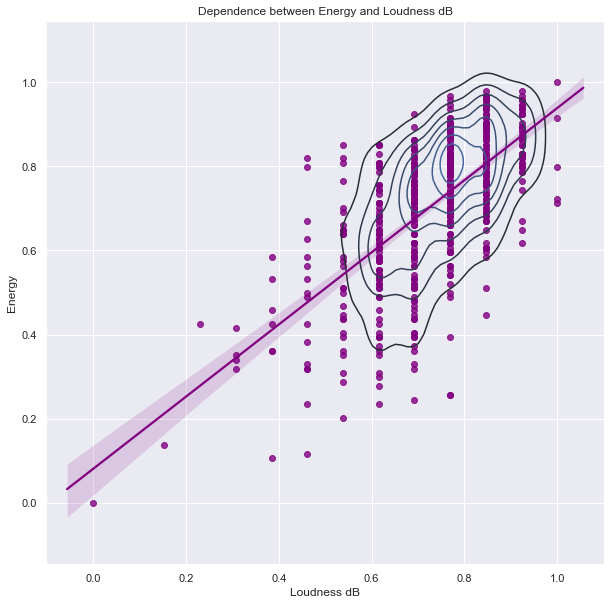

In [2191]:
# Analysing the relationship between energy and loudness db

fig = plt.subplots(figsize = (10,10))

plt.title('Dependence between Energy and Loudness dB')

sns.regplot(x = 'Loudness dB', y = 'Energy', data = df_norm, color='purple')

sns.kdeplot(df_norm['Loudness dB'], df_norm['Energy'])

print('The spearman correlation is:  ',correlation['Loudness dB']['Energy'])

The spearman correlation is:   0.36607237215859095


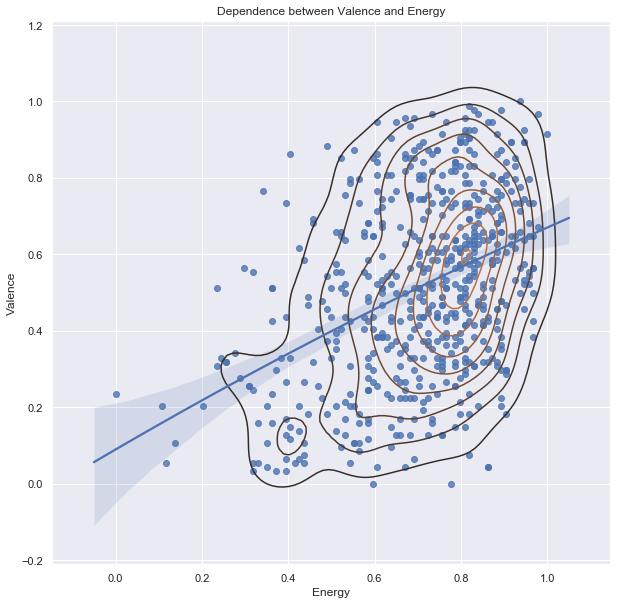

In [2192]:
# Analysing the relationship between energy and valence

fig = plt.subplots(figsize = (10,10))

plt.title('Dependence between Valence and Energy')

sns.regplot(x = 'Energy', y = 'Valence', order = 2,  data = df_norm)

sns.kdeplot(df_norm['Energy'], df_norm['Valence'])

print('The spearman correlation is:  ',correlation['Valence']['Energy'])

The spearman correlation is:   0.3240615337447169


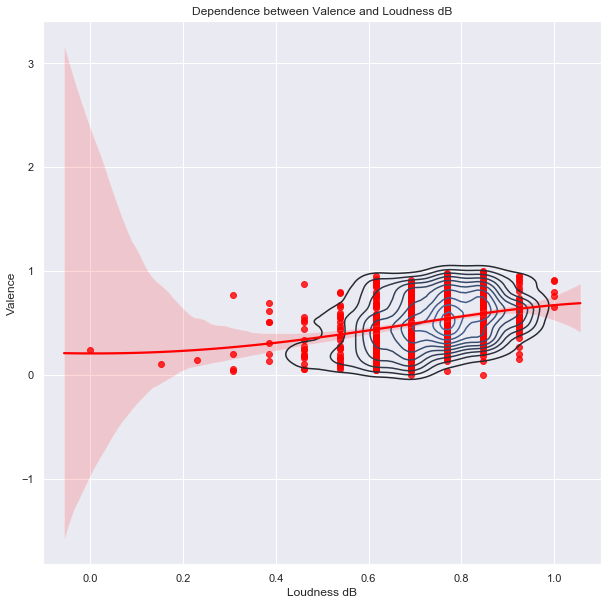

In [2193]:
# Analysing the relationship between loudness db and valence

fig = plt.subplots(figsize = (10,10))

plt.title('Dependence between Valence and Loudness dB')

sns.regplot(x = 'Loudness dB', y = 'Valence', order = 4, data = df_norm, color = 'red')

sns.kdeplot(df_norm['Loudness dB'], df_norm['Valence'])

print('The spearman correlation is:  ',correlation['Loudness dB']['Valence'])

The spearman correlation is:   0.21924275781192015


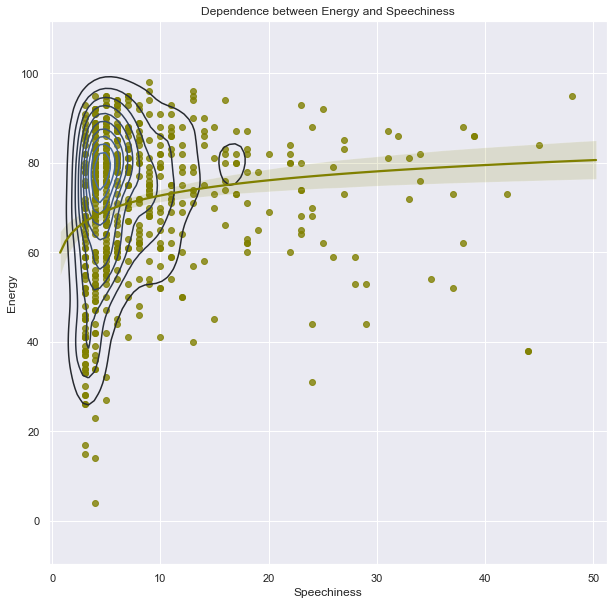

In [2194]:
# Analysing the relationship between speechiness and energy

fig = plt.subplots(figsize = (10,10))

plt.title('Dependence between Energy and Speechiness')

sns.regplot(x = 'Speechiness', y = 'Energy', logx=True ,data = df, color = 'olive')

sns.kdeplot(df['Speechiness'], df['Energy'])

print('The spearman correlation is:  ',correlation['Speechiness']['Energy'])

### _**Loud songs are pretty danceable... but not too loud!**_

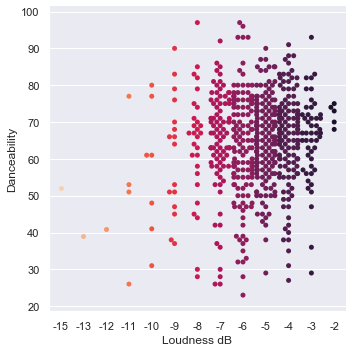

In [2195]:
# Analysing the relationship between loudness vs danceability

sns.catplot(y="Danceability", x="Loudness dB", kind = "swarm", data = df_features, palette = 'rocket_r')


### _**More recent songs are more popular, and some older songs drop off the radar**_

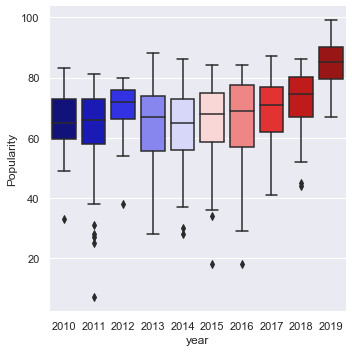

In [2196]:
# Analysing the spread of popularity throught the years

sns.catplot(y = "Popularity", x = "year", kind = "box", data = df, palette = 'seismic')



## Exploring Valence

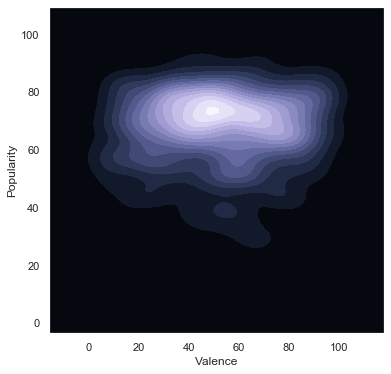

In [2197]:
# Analysing the relationship between valence vs popularity


f, ax = plt.subplots(figsize=(6, 6))

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True, start=2.8, rot=.1)

sns.kdeplot(df['Valence'], df['Popularity'], cmap=cmap, n_levels=16, shade=True);

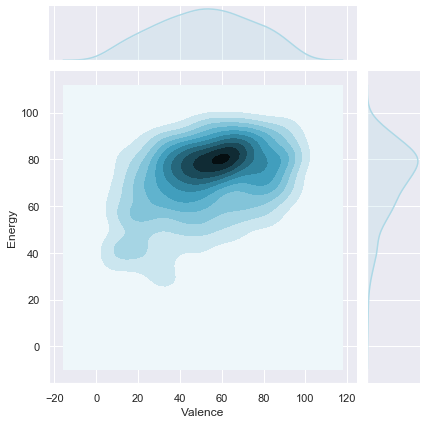

In [2198]:
# Analysing the relationship between valence vs energy

sns.jointplot(x=df['Valence'], y=df['Energy'], data=df, kind="kde", color='lightblue');

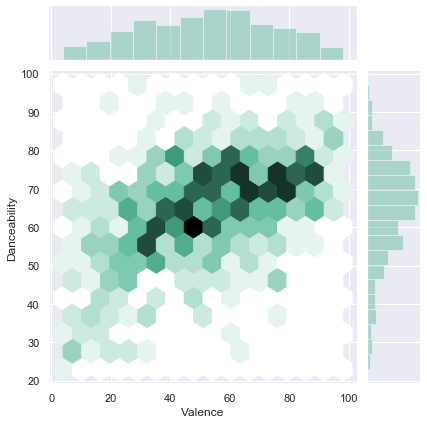

In [2199]:
# Analysing the relationship between valence vs danceability


sns.jointplot(df['Valence'], df['Danceability'], kind="hex", color="#4CB391")

# Part 2 -  HUMAN ANALYSIS - Look for trends in the features throughout the years and discover how to write a hit song in 2020

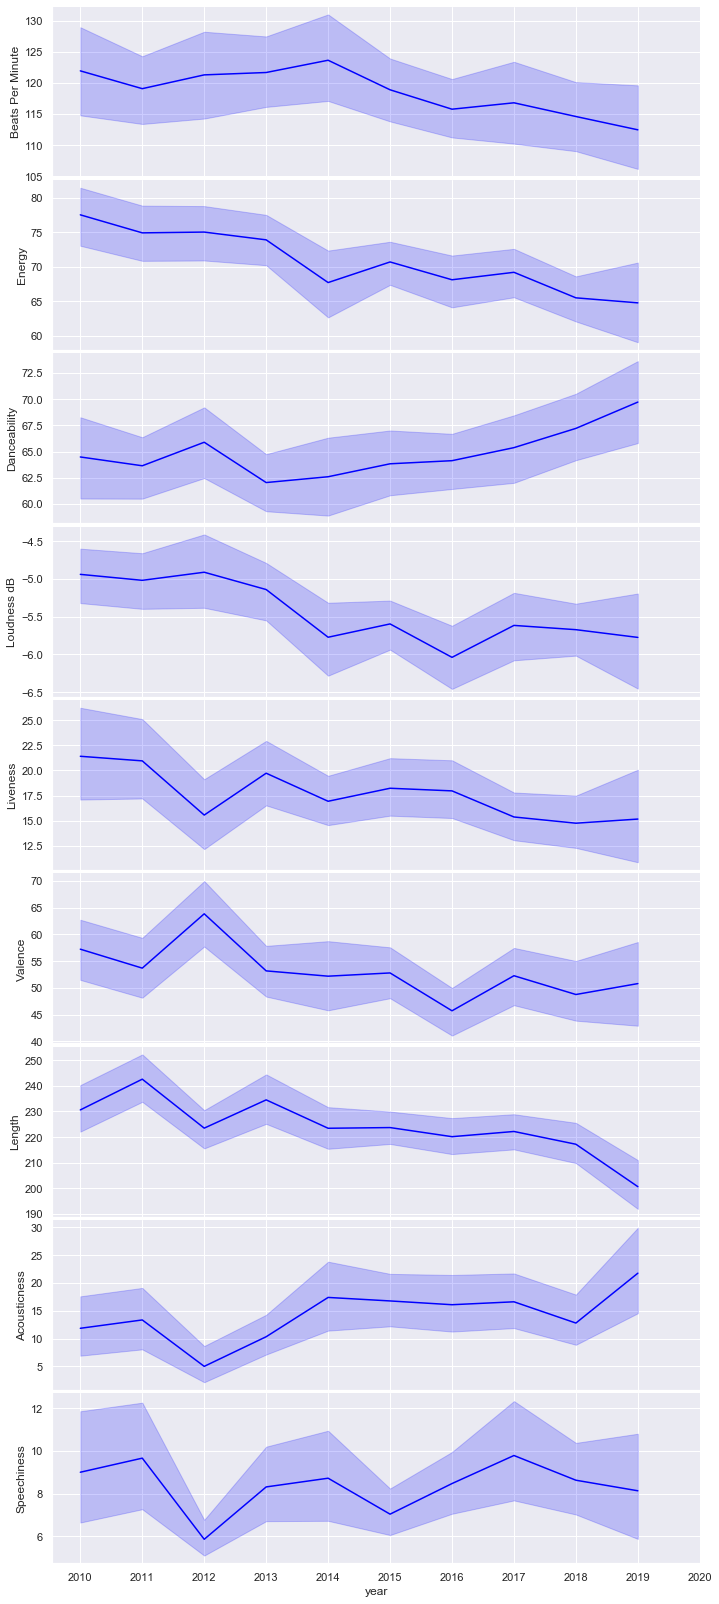

In [2200]:
# PairGrid to see trends over the years

sns.set()

g = sns.PairGrid(df, y_vars = ['Beats Per Minute', 'Energy', 'Danceability', 'Loudness dB', 
                               'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness'] , x_vars = ['year'], aspect = 4)

g = g.map(sns.lineplot, color="blue")

# Adjust the tick positions and labels

g.set(xticks=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])


# Adjust the arrangement of the plots

g.fig.subplots_adjust(wspace=.02, hspace=.02);

# _**Hit songs in 2020 in general are becoming way shorter, way more danceable, more acoustic, slower, with lots of bass, and low energy!**_ 

In [2201]:
# get a dataframe to see average yearly trends

df_reg = df_features.join(df['year'])

df_reg = df_reg.groupby('year').mean()

df_reg


,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
year,,,,,,,,,,
2010,121.940,77.500,64.480,-4.940,21.400,57.240,230.580,11.840,9.000,65.540
2011,119.075,74.887,63.642,-5.019,20.943,53.698,242.566,13.340,9.660,61.868
2012,121.294,75.000,65.882,-4.912,15.559,63.853,223.471,5.000,5.853,69.765
2013,121.676,73.873,62.042,-5.141,19.718,53.183,234.493,10.324,8.310,63.986
2014,123.649,67.684,62.596,-5.772,16.930,52.193,223.421,17.386,8.719,63.807
2015,118.894,70.670,63.830,-5.596,18.223,52.798,223.691,16.755,7.032,65.255
2016,115.772,68.089,64.127,-6.038,17.962,45.722,220.139,16.076,8.468,64.975
2017,116.800,69.169,65.369,-5.615,15.369,52.277,222.169,16.600,9.785,69.015
2018,114.594,65.469,67.203,-5.672,14.750,48.766,217.188,12.781,8.625,72.438


### Write a song that has the same Beats Per Minute as these below:

In [2380]:
# 2020 Prediction Ranges by eyeballing


pred_bpm = df[df['Beats Per Minute'] == 110]

pred_bpm = pred_bpm[['Track Name', 'Artist Name', 'Beats Per Minute']]

pred_bpm


,Track Name,Artist Name,Beats Per Minute
58,Grenade,Bruno Mars,110
106,Payphone,Maroon 5,110
241,G.U.Y.,Lady Gaga,110
263,It's On Again - Main Soundtrack,Alicia Keys,110
302,"Downtown (feat. Melle Mel, Grandmaster Caz, Ko...",Macklemore & Ryan Lewis,110
412,Cruel (feat. ZAYN),Snakehips,110
427,Start,John Legend,110
493,Rich Boy,Galantis,110
521,What Lovers Do (feat. SZA),Maroon 5,110
563,Boom Boom,RedOne,110


### Write a song that has the same Energy as these below:

In [2379]:


pred_en = df[df['Energy'] == 65]

pred_en = pred_en[['Track Name', 'Artist Name', 'Energy']]


pred_en

,Track Name,Artist Name,Energy
64,Best Thing I Never Had,Beyoncé,65
229,Talk Dirty (feat. 2 Chainz),Jason Derulo,65
382,Too Good,Drake,65
430,Invitation,Britney Spears,65
438,Shape of You,Ed Sheeran,65
450,Something Just Like This,The Chainsmokers,65
579,Beautiful People (feat. Khalid),Ed Sheeran,65


### Write a song that has the same Danceability as these below:

In [2378]:



pred_dan = df[df['Danceability'] == 70]

pred_dan = pred_dan[['Track Name', 'Artist Name', 'Danceability']]

pred_dan


,Track Name,Artist Name,Danceability
3,Bad Romance,Lady Gaga,70
23,Misery,Maroon 5,70
30,3,Britney Spears,70
78,I Wanna Go,Britney Spears,70
83,Please Don't Go,Mike Posner,70
134,You Da One,Rihanna,70
194,Anything Could Happen,Ellie Goulding,70
233,Wiggle (feat. Snoop Dogg),Jason Derulo,70
322,On My Mind,Ellie Goulding,70
391,Final Song,MØ,70


### Write a song that has the same Loudness dB level as these below:

In [2377]:


pred_loud = df[df['Loudness dB'] == -6]

pred_loud = pred_loud[['Track Name', 'Artist Name', 'Loudness dB']]

pred_loud



,Track Name,Artist Name,Loudness dB
7,Secrets,OneRepublic,-6
13,Telephone,Lady Gaga,-6
15,OMG (feat. will.i.am),Usher,-6
25,Animal,Neon Trees,-6
38,Rock That Body,The Black Eyed Peas,-6
...,...,...,...
573,Trampoline (with ZAYN),SHAED,-6
578,Only Human,Jonas Brothers,-6
588,Call You Mine,The Chainsmokers,-6
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,-6


### Write a song that has the same Liveness as these below:

In [2376]:


pred_live = df[df['Liveness'] == 15]

pred_live = pred_live[['Track Name', 'Artist Name', 'Liveness']]

pred_live


,Track Name,Artist Name,Liveness
172,I Love It (feat. Charli XCX),Icona Pop,15
185,Girl On Fire (feat. Nicki Minaj) - Inferno Ver...,Alicia Keys,15
235,This Is How We Do,Katy Perry,15
290,Elastic Heart,Sia,15
365,This Is What You Came For,Calvin Harris,15
394,All I Ask,Adele,15
419,Hurts,Emeli Sandé,15
468,All I Ask,Adele,15
474,Tired,Alan Walker,15
476,24K Magic,Bruno Mars,15


### Write a song that has the same Valence as these below:

In [2375]:


pred_val = df[df['Valence'] == 54]

pred_val = pred_val[['Track Name', 'Artist Name', 'Valence']]

pred_val

,Track Name,Artist Name,Valence
5,Baby,Justin Bieber,54
45,Not Myself Tonight,Christina Aguilera,54
164,Feel This Moment (feat. Christina Aguilera),Pitbull,54
355,Spark The Fire,Gwen Stefani,54
447,Stay,Zedd,54
453,My Way,Calvin Harris,54
482,Get Low (with Liam Payne),Zedd,54


### Write a song that has the same Length as these below:

In [2374]:


pred_len = df[df['Length'] == 190]

pred_len = pred_len[['Track Name', 'Artist Name', 'Length']]

pred_len


,Track Name,Artist Name,Length
216,Maps,Maroon 5,190
253,Not About Angels,Birdy,190
564,...Ready For It? - BloodPop® Remix,Taylor Swift,190


### Write a song that has the same Acousticness as these below:

In [2373]:



pred_ac = df[df['Acousticness'] == 27]

pred_ac = pred_ac[['Track Name', 'Artist Name', 'Acousticness']]

pred_ac


,Track Name,Artist Name,Acousticness
249,Come Get It Bae,Pharrell Williams,27
320,Focus,Ariana Grande,27
330,Bang Bang,Jessie J,27


### Write a song that has the same Speechiness as these below:

In [2372]:


pred_sp = df[df['Speechiness'] == 8]

pred_sp = pred_sp[['Track Name', 'Artist Name', 'Speechiness']]

pred_sp



,Track Name,Artist Name,Speechiness
31,My First Kiss - feat. Ke$ha,3OH!3,8
115,Starships,Nicki Minaj,8
131,We Are Young (feat. Janelle Monáe),fun.,8
154,Under Control,Calvin Harris,8
163,Can't Hold Us (feat. Ray Dalton),Macklemore & Ryan Lewis,8
249,Come Get It Bae,Pharrell Williams,8
269,Uptown Funk,Mark Ronson,8
286,Blame,Calvin Harris,8
300,Jealous - Remix,Nick Jonas,8
303,Only Love Can Hurt Like This,Paloma Faith,8


### Now that's a lot of songs to consider...  let's focus on the four features that impact Popularity the most

In [2211]:
# Highest positive correlation with Popularity

pos_corr = correlation['Popularity'].sort_values(ascending=False)

pos_corr = pos_corr[['Acousticness', 'Danceability']]

pos_corr = pd.DataFrame(pos_corr)

pos_corr


,Popularity
Acousticness,0.1
Danceability,0.1


In [2212]:
# Highest negative correlation with Popularity

neg_corr = correlation['Popularity'].sort_values(ascending=True)

neg_corr  = neg_corr[['Energy', 'Liveness']]

neg_corr = pd.DataFrame(neg_corr)

neg_corr

,Popularity
Energy,-0.149
Liveness,-0.095


### Human Prediction for 2020

In [2213]:
# Using the highest correlating features make a prediction for 2020

pred_2020 = df[((df['Acousticness'] >  25)       &   (df['Acousticness'] <  40)) 
               & ((df['Danceability'] >  67.5)   &   (df['Danceability'] <  80))  
               & ((df['Energy'] >  55)           &   (df['Energy'] <  64))  
               & ((df['Liveness'] >  10)         &   (df['Liveness'] <  15))      ] 

pred_2020

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
378,Starving,Hailee Steinfeld,dance pop,2016,100,62,73,-4,11,51,182,38,6,78


## So basically, if you want to write a hit song in 2020... write one like Starving by Hailee Steinfeld!

# Part 3 -  MACHINE LEARNING ANALYSIS - Use multiple linear regression to analyze the trends throughout the years and discover how to write a hit song in 2020

### Multiple Linear Regression on the Features 

In [2308]:
# inspect features dataframe

df_features.head()

,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,2010,97,89,67,-4,8,80,217,19,4,83
1,2010,87,93,75,-5,52,64,263,24,23,82
2,2010,120,84,76,-3,29,71,200,10,14,80
3,2010,119,92,70,-4,8,71,295,0,4,79
4,2010,109,84,64,-5,9,43,221,2,4,78


In [2293]:
# insert year cloumn

df_features.insert(0, 'year', df['year'])


df_features.head()

,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,2010,97,89,67,-4,8,80,217,19,4,83
1,2010,87,93,75,-5,52,64,263,24,23,82
2,2010,120,84,76,-3,29,71,200,10,14,80
3,2010,119,92,70,-4,8,71,295,0,4,79
4,2010,109,84,64,-5,9,43,221,2,4,78


In [2309]:
# Include all features


X = df_features[['year']]
y = df_features[['Beats Per Minute', 'Energy', 'Danceability', 'Loudness dB', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate model
mlr = LinearRegression()


# Fit Model
mlr.fit(X_train, y_train)

# Predict
y_pred = mlr.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

18.428772573412797


In [2310]:
# print the R-squared value for the model
mlr.score(X, y)

0.026721313010059235

In [2311]:
# print the coefficients

list(zip(y, mlr.coef_, mlr.intercept_))

[('Beats Per Minute', array([-0.9303013]), 1992.6713596101808),
 ('Energy', array([-1.04762439]), 2181.6440474062038),
 ('Danceability', array([0.56580474]), -1075.5416334594954),
 ('Loudness dB', array([-0.06678051]), 129.06997293931192),
 ('Liveness', array([-0.79605999]), 1621.8594813923676),
 ('Valence', array([-0.51970006]), 1099.7025930381603),
 ('Length', array([-3.21219155]), 6695.358432904341),
 ('Acousticness', array([0.32368583]), -638.3357449568032),
 ('Speechiness', array([-0.09318059]), 196.29324482801468),
 ('Popularity', array([1.40880881]), -2771.373229918879)]

In [2320]:
##### predict a hit song in 2020's features

mlr.predict([[2020]])

array([[113.46272564,  65.44278619,  67.38395116,  -5.82664796,
         13.81830551,  49.90847245, 206.73149767,  15.50963033,
          8.06846233,  74.42057552]])

### According to the algorithm write a song that has the same BPM as these below:

In [2371]:

mlr_pred_bpm = df[df['Beats Per Minute'] == 113]

mlr_pred_bpm = mlr_pred_bpm[['Track Name', 'Artist Name', 'Beats Per Minute']]

mlr_pred_bpm



,Track Name,Artist Name,Beats Per Minute
267,The Hills,The Weeknd,113
334,Been You,Justin Bieber,113
359,The Hills,The Weeknd,113
369,CAN'T STOP THE FEELING! (Original Song from Dr...,Justin Timberlake,113
408,LIKE I WOULD,ZAYN,113
497,Remember I Told You,Nick Jonas,113
547,For You (With Rita Ora),Liam Payne,113


### According to the algorithm write a song that has the same Energy as these below:

In [2370]:


mlr_pred_en = df[df['Energy'] == 65]

mlr_pred_en = mlr_pred_en[['Track Name', 'Artist Name', 'Energy']]

mlr_pred_en



,Track Name,Artist Name,Energy
64,Best Thing I Never Had,Beyoncé,65
229,Talk Dirty (feat. 2 Chainz),Jason Derulo,65
382,Too Good,Drake,65
430,Invitation,Britney Spears,65
438,Shape of You,Ed Sheeran,65
450,Something Just Like This,The Chainsmokers,65
579,Beautiful People (feat. Khalid),Ed Sheeran,65


### According to the algorithm write a song that has the same Danceability as these below:

In [2369]:
mlr_pred_dan = df[df['Danceability'] == 67]

mlr_pred_dan = mlr_pred_dan[['Track Name', 'Artist Name', 'Danceability']]

mlr_pred_dan

,Track Name,Artist Name,Danceability
0,"Hey, Soul Sister",Train,67
49,Break Your Heart,Taio Cruz,67
52,Give Me Everything,Pitbull,67
114,Try,P!nk,67
120,International Love,Pitbull,67
121,Some Nights,fun.,67
164,Feel This Moment (feat. Christina Aguilera),Pitbull,67
182,Next To Me,Emeli Sandé,67
193,Applause,Lady Gaga,67
204,Give It 2 U,Robin Thicke,67


### According to the algorithm write a song that has the same Loudness dB as these below:

In [2368]:
mlr_pred_ld = df[df['Loudness dB'] == -6]

mlr_pred_ld = mlr_pred_ld[['Track Name', 'Artist Name', 'Loudness dB']]

mlr_pred_ld

,Track Name,Artist Name,Loudness dB
7,Secrets,OneRepublic,-6
13,Telephone,Lady Gaga,-6
15,OMG (feat. will.i.am),Usher,-6
25,Animal,Neon Trees,-6
38,Rock That Body,The Black Eyed Peas,-6
...,...,...,...
573,Trampoline (with ZAYN),SHAED,-6
578,Only Human,Jonas Brothers,-6
588,Call You Mine,The Chainsmokers,-6
594,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,-6


### According to the algorithm write a song that has the same Liveness as these below:

In [2367]:
mlr_pred_lv = df[df['Liveness'] == 14]

mlr_pred_lv = mlr_pred_lv[['Track Name', 'Artist Name', 'Liveness']]

mlr_pred_lv

,Track Name,Artist Name,Liveness
30,3,Britney Spears,14
44,You Lost Me,Christina Aguilera,14
60,What the Hell,Avril Lavigne,14
168,If I Lose Myself - Alesso vs OneRepublic,OneRepublic,14
194,Anything Could Happen,Ellie Goulding,14
210,Summer,Calvin Harris,14
245,Can't Remember to Forget You (feat. Rihanna),Shakira,14
259,Words as Weapons,Birdy,14
267,The Hills,The Weeknd,14
295,The Heart Wants What It Wants,Selena Gomez,14


### According to the algorithm write a song that has the same Valence as these below:

In [2366]:
mlr_pred_val = df[df['Valence'] == 50]

mlr_pred_val = mlr_pred_val[['Track Name', 'Artist Name', 'Valence']]

mlr_pred_val

,Track Name,Artist Name,Valence
149,Heart Attack,Demi Lovato,50
199,Crazy Kids (feat. will.i.am),Kesha,50
232,Young Girls,Bruno Mars,50
290,Elastic Heart,Sia,50
384,Cold Water (feat. Justin Bieber & MØ),Major Lazer,50
395,Just Like Fire (From the Original Motion Pictu...,P!nk,50
531,Tequila,Dan + Shay,50
564,...Ready For It? - BloodPop® Remix,Taylor Swift,50
573,Trampoline (with ZAYN),SHAED,50


### According to the algorithm write a song that has the same Length as these below:

In [2365]:
mlr_pred_len = df[df['Length'] == 207]

mlr_pred_len = mlr_pred_len[['Track Name', 'Artist Name', 'Length']]

mlr_pred_len

,Track Name,Artist Name,Length
179,Rock N Roll,Avril Lavigne,207
206,Outta Nowhere (feat. Danny Mercer),Pitbull,207
245,Can't Remember to Forget You (feat. Rihanna),Shakira,207
264,I Luh Ya Papi,Jennifer Lopez,207
277,Stitches,Shawn Mendes,207
374,Stitches,Shawn Mendes,207
442,That's What I Like,Bruno Mars,207


### According to the algorithm write a song that has the same Acousticness as these below:

In [2364]:
mlr_pred_ac = df[df['Acousticness'] == 16]

mlr_pred_ac = mlr_pred_ac[['Track Name', 'Artist Name', 'Acousticness']]

mlr_pred_ac

,Track Name,Artist Name,Acousticness
34,Try Sleeping with a Broken Heart,Alicia Keys,16
161,Work Bitch,Britney Spears,16
206,Outta Nowhere (feat. Danny Mercer),Pitbull,16
291,Rather Be (feat. Jess Glynne),Clean Bandit,16
362,Don't Let Me Down,The Chainsmokers,16
421,Make Me... (feat. G-Eazy),Britney Spears,16
422,Keeping Your Head Up,Birdy,16
471,"How Far I'll Go - From ""Moana""",Alessia Cara,16
560,Never Be the Same - Radio Edit,Camila Cabello,16
591,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",DJ Snake,16


### According to the algorithm write a song that has the same Speechiness as these below:

In [2363]:
mlr_pred_sp = df[df['Speechiness'] == 8]

mlr_pred_sp = mlr_pred_sp[['Track Name', 'Artist Name', 'Speechiness']]

mlr_pred_sp

,Track Name,Artist Name,Speechiness
31,My First Kiss - feat. Ke$ha,3OH!3,8
115,Starships,Nicki Minaj,8
131,We Are Young (feat. Janelle Monáe),fun.,8
154,Under Control,Calvin Harris,8
163,Can't Hold Us (feat. Ray Dalton),Macklemore & Ryan Lewis,8
249,Come Get It Bae,Pharrell Williams,8
269,Uptown Funk,Mark Ronson,8
286,Blame,Calvin Harris,8
300,Jealous - Remix,Nick Jonas,8
303,Only Love Can Hurt Like This,Paloma Faith,8


### Now that's a lot to focus on so let's narrow it down by the features with the highest correlation

In [2319]:
# Using the highest correlating features make a prediction for 2020

mlr_pred_2020 = df[((df['Acousticness'] >  7)       &   (df['Acousticness'] <  23)) 
               & ((df['Danceability'] >  63)   &   (df['Danceability'] <  71))  
               & ((df['Energy'] >  59)           &   (df['Energy'] <  71))  
               & ((df['Liveness'] >  9)         &   (df['Liveness'] <  17))      ] 

mlr_pred_2020

,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
69,Just Cant Get Enough,The Black Eyed Peas,dance pop,2011,94,63,66,-9,11,26,219,19,18,71
233,Wiggle (feat. Snoop Dogg),Jason Derulo,dance pop,2014,82,62,70,-7,16,72,193,8,25,67
550,Wait,Maroon 5,pop,2018,126,60,66,-5,11,45,191,10,6,67


### That's pretty good but we can use all of the features and their std's to narrow it down further!

In [2362]:
df_features.describe()

,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000,598.000
mean,2014.602,118.651,70.589,64.527,-5.492,17.758,52.339,224.659,14.396,8.391,67.077
std,2.608,24.141,16.007,13.152,1.701,13.100,22.459,34.154,20.817,7.501,13.235
min,2010.000,43.000,4.000,23.000,-15.000,2.000,4.000,134.000,0.000,3.000,7.000
25%,2013.000,100.000,61.000,57.000,-6.000,9.000,35.000,202.000,2.000,4.000,60.000
50%,2015.000,120.000,74.000,66.000,-5.000,12.000,52.000,220.500,6.000,5.000,69.000
75%,2017.000,129.000,82.000,73.750,-4.000,24.000,69.000,239.000,17.000,9.000,76.000
max,2019.000,206.000,98.000,97.000,-2.000,74.000,98.000,424.000,99.000,48.000,99.000


### Machine Learning Prediction for 2020...

In [2332]:
# Using the highest correlating features to probability to make a prediction for 2020 and their corresponding std's

mlr_pred_2020 = df[((df['Beats Per Minute'] >  100)    &   (df['Beats Per Minute'] <  128)) 
               & ((df['Energy'] >  55)                 &   (df['Energy'] <  77))  
               & ((df['Danceability'] >  60)           &   (df['Danceability'] <  75))
                   & ((df['Loudness dB'] >  -7.6)      &   (df['Loudness dB'] <  -4))
                   & ((df['Liveness'] >  1)            &   (df['Liveness'] <  26))
                   & ((df['Valence'] >  30)            &   (df['Valence'] <  70))
                   & ((df['Length'] >  187)            &   (df['Length'] <  225))
                   & ((df['Acousticness'] >  8)        &   (df['Acousticness'] <  25))
               & ((df['Speechiness'] >  0)             &   (df['Speechiness'] <  16))      ] 

mlr_pred_2020


,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
550,Wait,Maroon 5,pop,2018,126,60,66,-5,11,45,191,10,6,67


## The Machine Learning Prediction for 2020 is Wait by Maroon 5. If you want to write a hit song in 2020 write one like that!

# PART 4    -    Use Multiple Linear Regression to make a prediction for 2020 based of of Popularity rather than the yearly trends

# PART 5    -    Now let's categorize them into unique playlists using Unsupervised Machine Learning Clustering technique K-Means

### Standardization of the data to fix skew and get mean=0 and std=1 in order to help with clustering

In [2002]:
# Finding out the skew for each feature

skew = df_features.skew()

print(skew)

Beats Per Minute    0.707
Energy             -0.923
Danceability       -0.554
Loudness dB        -0.999
Liveness            1.733
Valence            -0.068
Length              1.348
Acousticness        2.196
Speechiness         2.534
Popularity         -0.960
dtype: float64


In [2003]:
# scale the data

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_features)

df_scaled = pd.DataFrame(df_scaled)

df_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.898,1.151,0.188,0.878,-0.745,1.233,-0.224,0.221,-0.586,1.204
1,-1.312,1.401,0.797,0.289,2.616,0.520,1.124,0.462,1.949,1.129
2,0.056,0.839,0.873,1.466,0.859,0.832,-0.723,-0.211,0.748,0.977
3,0.014,1.339,0.416,0.878,-0.745,0.832,2.061,-0.692,-0.586,0.902
4,-0.400,0.839,-0.040,0.289,-0.669,-0.416,-0.107,-0.596,-0.586,0.826


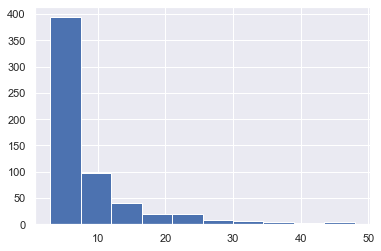

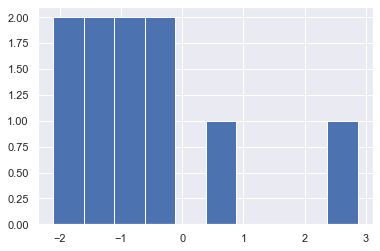

In [2004]:
# Plot to show the difference

plt.hist(df_features['Speechiness'], bins=10)                    #original data
plt.show()

plt.hist(df_scaled.iloc[8], bins=10)                            #standardized data
plt.show()

### Find the appropriate amount of clusters

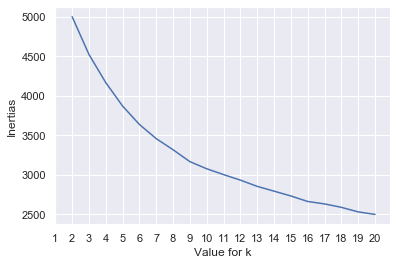

In [2005]:


# choose the best number of clusters using elbow method and inertia

inertias = []

for i in k:
    km = KMeans(n_clusters=i, max_iter=1000, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.plot(k, inertias)
plt.xlabel("Value for k")
plt.ylabel("Inertias")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.show()


In [2006]:


k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

score=[]

for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    score.append(silhouette_score(df_scaled, kmeans.labels_))
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))



Silhouette Score for 2 Clusters: 0.2487
Silhouette Score for 3 Clusters: 0.1373
Silhouette Score for 4 Clusters: 0.1281
Silhouette Score for 5 Clusters: 0.1313
Silhouette Score for 6 Clusters: 0.1282
Silhouette Score for 7 Clusters: 0.1212
Silhouette Score for 8 Clusters: 0.1207
Silhouette Score for 9 Clusters: 0.1179
Silhouette Score for 10 Clusters: 0.1167
Silhouette Score for 11 Clusters: 0.1166
Silhouette Score for 12 Clusters: 0.1053
Silhouette Score for 13 Clusters: 0.0962
Silhouette Score for 14 Clusters: 0.1010
Silhouette Score for 15 Clusters: 0.0985
Silhouette Score for 16 Clusters: 0.1042
Silhouette Score for 17 Clusters: 0.1048
Silhouette Score for 18 Clusters: 0.1155
Silhouette Score for 19 Clusters: 0.1021
Silhouette Score for 20 Clusters: 0.0945


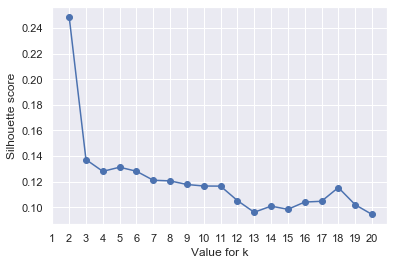

In [2007]:
# plot cluster options

plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.show()

In [2008]:
# set number of clusters

kclusters = 6


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=42).fit(df_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 5, 1, 1, 1, 1, 1, 4, 3, 1], dtype=int32)

In [2009]:
# add clustering labels to dataframe

df.insert(0, 'Playlist Number', kmeans.labels_)



df.head()    # check out the Cluster Labels column!

,Playlist Number,Track Name,Artist Name,Genre,year,Beats Per Minute,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,5,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,1,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,1,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,1,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Playlist #1

In [2010]:
df.loc[df['Playlist Number'] == 0, df.columns[[0, 1, 2]]]



,Playlist Number,Track Name,Artist Name
14,0,Like A G6,Far East Movement
33,0,Imma Be,The Black Eyed Peas
40,0,Something's Got A Hold On Me - Burlesque Origi...,Christina Aguilera
48,0,Castle Walls (feat. Christina Aguilera),T.I.
74,0,Sexy And I Know It,LMFAO
94,0,Castle Walls (feat. Christina Aguilera),T.I.
99,0,Moment 4 Life - Album Version (Edited),Nicki Minaj
102,0,Muny - Album Version (Edited),Nicki Minaj
167,0,Thrift Shop (feat. Wanz),Macklemore & Ryan Lewis
170,0,Suit & Tie,Justin Timberlake


## Playlist #2

In [2011]:
df.loc[df['Playlist Number'] == 1, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
0,1,"Hey, Soul Sister",Train
2,1,TiK ToK,Kesha
3,1,Bad Romance,Lady Gaga
4,1,Just the Way You Are,Bruno Mars
5,1,Baby,Justin Bieber
...,...,...,...
586,1,All Around The World (La La La),R3HAB
590,1,Antisocial (with Travis Scott),Ed Sheeran
591,1,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",DJ Snake
592,1,Con Calma - Remix,Daddy Yankee


## Playlist #3

In [2044]:
df.loc[df['Playlist Number'] == 2, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
20,2,Meet Me Halfway,The Black Eyed Peas
41,2,Doesn't Mean Anything,Alicia Keys
58,2,Grenade,Bruno Mars
64,2,Best Thing I Never Had,Beyoncé
68,2,Good Life,OneRepublic
...,...,...,...
587,2,Girls Like You (feat. Cardi B),Maroon 5
588,2,Call You Mine,The Chainsmokers
589,2,No Guidance (feat. Drake),Chris Brown
593,2,Find U Again (feat. Camila Cabello),Mark Ronson


## Playlist #4

In [2013]:
df.loc[df['Playlist Number'] == 3, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
8,3,Empire State of Mind (Part II) Broken Down,Alicia Keys
36,3,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera
44,3,You Lost Me,Christina Aguilera
50,3,A Thousand Years,Christina Perri
51,3,Someone Like You,Adele
86,3,1+1,Beyoncé
93,3,Jar of Hearts,Christina Perri
95,3,Turning Page,Sleeping At Last
146,3,Wrecking Ball,Miley Cyrus
184,3,Clown,Emeli Sandé


## Playlist #5

In [2014]:
df.loc[df['Playlist Number'] == 4, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
7,4,Secrets,OneRepublic
11,4,Marry You,Bruno Mars
21,4,Whataya Want from Me,Adam Lambert
24,4,All The Right Moves,OneRepublic
34,4,Try Sleeping with a Broken Heart,Alicia Keys
...,...,...,...
544,4,End Game,Taylor Swift
551,4,What About Us,P!nk
553,4,2U (feat. Justin Bieber),David Guetta
560,4,Never Be the Same - Radio Edit,Camila Cabello


## Playlist #6

In [2015]:
df.loc[df['Playlist Number'] == 5, df.columns[[0, 1, 2]]]

,Playlist Number,Track Name,Artist Name
1,5,Love The Way You Lie,Eminem
12,5,Cooler Than Me - Single Mix,Mike Posner
15,5,OMG (feat. will.i.am),Usher
17,5,The Time (Dirty Bit),The Black Eyed Peas
18,5,Alejandro,Lady Gaga
...,...,...,...
490,5,We Don't Talk Anymore - DROELOE Remix,Charlie Puth
505,5,I Like It,Cardi B
547,5,For You (With Rita Ora),Liam Payne
576,5,Good as Hell (feat. Ariana Grande) - Remix,Lizzo


# Now all we have to do is name these playlists... I'll leave that up to you!